# Surprise Package for Collabrative Filtering

### Using Singular Value Decomposition(SVD) on the Jester Small dataset.

In [1]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("JesterSmall.csv",sep="\t")

In [3]:
df.head()

,User ID,Joke ID,Rating
0,0,0,-7.82
1,0,1,8.79
2,0,2,-9.66
3,0,3,-8.16
4,0,4,-7.52


In [4]:
df.max()

User ID    1999.0
Joke ID      99.0
Rating        9.9
dtype: float64

In [5]:
df.min()

User ID    0.00
Joke ID    0.00
Rating    -9.95
dtype: float64

In [6]:
'''
Surprise functions to read the data and enable it into Surprise Data Object's so that they can be processed
'''
reader = Reader(rating_scale=(-9.95, 9.9))
data = Dataset.load_from_df(df, reader=reader)

In [7]:
'''
Splitting the data into train and test with size of test = 20%
'''
train, test = train_test_split(data, test_size=0.2)

In [8]:
'''
Declaring the model: {
                        model: Singular Value Decmoposition()
                        Epochs: 20
                        Learning Rate = 0.005
                        Print every epoch.
                    }

Train it and then test it.
'''
model = SVD(lr_all=0.005, n_epochs=20,verbose=True)
model.fit(train)
predictions = model.test(test)
accuracy.rmse(predictions, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 4.3716


4.371585692679186

In [19]:
print(predictions[:5])

[Prediction(uid=1579, iid=52, r_ui=0.9700000000000006, est=5.190223774153143, details={'was_impossible': False}), Prediction(uid=781, iid=57, r_ui=-9.13, est=-7.261308604928508, details={'was_impossible': False}), Prediction(uid=721, iid=65, r_ui=6.5, est=9.292770522055346, details={'was_impossible': False}), Prediction(uid=1388, iid=48, r_ui=8.59, est=9.9, details={'was_impossible': False}), Prediction(uid=1545, iid=41, r_ui=-2.620000000000001, est=-0.452710838985805, details={'was_impossible': False})]


# Fast.ai collab module for Collabrative Filtering

In [9]:
from fastai.collab import *

In [10]:
'''
Making the data into fastAI data object to enable it train
'''
data = CollabDataBunch.from_df(df)

### Embedding Dot Bias Model

In [11]:
'''
Make the model:
    This will be a model that train's its User and Item(Joke) embedding
    on the basis of dot product.
    n_factors defines the Embedding Size of a User and Item
    y_range defines the prediction range.
'''
dotModel = collab_learner(data, n_factors=50, y_range=(-9.95, 9.9))

In [12]:
dotModel.summary()

Layer (type)         Output Shape         Param #    Trainable 
Embedding            [50]                 100,050    True      
______________________________________________________________________
Embedding            [50]                 5,050      True      
______________________________________________________________________
Embedding            [1]                  2,001      True      
______________________________________________________________________
Embedding            [1]                  101        True      
______________________________________________________________________

Total params: 107,202
Total trainable params: 107,202
Total non-trainable params: 0

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


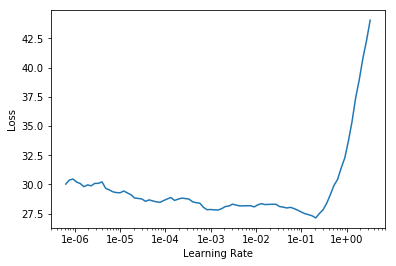

In [13]:
'''
Finding a suitable learning rate for the model.
'''

dotModel.lr_find()
dotModel.recorder.plot()

In [14]:
'''
Fit the model for
    Epochs = 10
    Learning Rate = 5e-3
    Weight Decay = 0.1
'''

dotModel.fit_one_cycle(10, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,19.136320,19.425289,00:12
1,18.132681,17.820518,00:13
2,17.347113,17.125387,00:13
3,15.714090,16.997349,00:13
4,15.183762,16.897266,00:14
5,13.834426,16.733162,00:14
6,11.622610,16.793247,00:12
7,9.832749,16.836411,00:12
8,7.968737,16.906887,00:12
9,6.858262,16.920395,00:12


### Embedding NN Model

In [15]:
'''
Make a NN model:
    This will be a model that train's its User and Item(Joke) embedding
    on the basis of described Neural Net.
    emb_szs -> defines the Embedding Size of a User and Item
    y_range -> defines the prediction range.
    layers -> defines the Neural Network Layer's
'''

nnModel = collab_learner(data, use_nn=True, emb_szs={'user_id': 50, 'book_id':50},
                       layers=[256,64,128,32],y_range=(-9.95, 9.9))

In [16]:
nnModel.summary()

Layer (type)         Output Shape         Param #    Trainable 
Embedding            [113]                226,113    True      
______________________________________________________________________
Embedding            [21]                 2,121      True      
______________________________________________________________________
Dropout              [134]                0          False     
______________________________________________________________________
Linear               [256]                34,560     True      
______________________________________________________________________
ReLU                 [256]                0          False     
______________________________________________________________________
BatchNorm1d          [256]                512        True      
______________________________________________________________________
Linear               [64]                 16,448     True      
______________________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


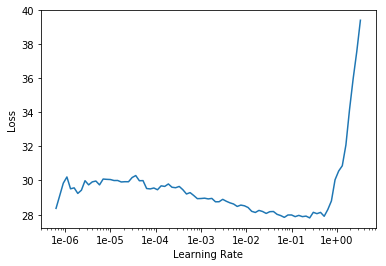

In [17]:
'''
Finding a suitable learning rate for the model.
'''
nnModel.lr_find()
nnModel.recorder.plot()

In [18]:
'''
Fit the model for
    Epochs = 10
    Learning Rate = 5e-3
    Weight Decay = 0.1
'''

nnModel.fit_one_cycle(10, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,20.178061,19.522467,00:24
1,18.931713,19.049582,00:25
2,19.669626,18.780663,00:24
3,18.836143,18.630550,00:24
4,18.915874,18.513733,00:28
5,18.427200,18.198719,00:27
6,17.419317,17.681223,00:27
7,16.645329,17.369942,00:23
8,16.024899,17.286438,00:28
9,14.888332,17.473564,00:22
